In [27]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import pandas as pd

pd.set_option("display.max_columns", None)


import matplotlib
matplotlib.use('Agg')  # Use Agg backend if full matplotlib is imported

import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # if only plt is imported

get_ipython().run_line_magic('matplotlib', 'inline')

import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

RANDOM_SEED = 42

# Set default style for seaborn
sns.set(style='whitegrid')


In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
# Data Loading
data_path = '/content/drive/MyDrive/CKD_India.csv'
df = pd.read_csv(data_path, delimiter=',', encoding='ascii')

print('Dataset loaded successfully.')
print('Shape:', df.shape)

Dataset loaded successfully.
Shape: (1100, 26)


In [30]:
new_df = df.copy()

In [31]:
new_df.columns = [
    'id','age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
    'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
    'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
    'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count',
    'red_blood_cell_count', 'hypertension', 'diabetes_mellitus',
    'coronary_artery_disease', 'appetite', 'peda_edema', 'anemia', 'class'
]

## 5. Encode Text Labels into Numerical

In [32]:
new_df['class'] = new_df['class'].map({'ckd': 1, 'notckd': 0})
new_df['red_blood_cells'] = new_df['red_blood_cells'].map({'normal': 1, 'abnormal': 0})
new_df['pus_cell'] = new_df['pus_cell'].map({'normal': 1, 'abnormal': 0})
new_df['pus_cell_clumps'] = new_df['pus_cell_clumps'].map({'present': 1, 'notpresent': 0})
new_df['bacteria'] = new_df['bacteria'].map({'present': 1, 'notpresent': 0})
new_df['hypertension'] = new_df['hypertension'].map({'yes': 1, 'no': 0})
new_df['diabetes_mellitus'] = new_df['diabetes_mellitus'].map({'yes': 1, 'no': 0})
new_df['coronary_artery_disease'] = new_df['coronary_artery_disease'].map({'yes': 1, 'no': 0})
new_df['appetite'] = new_df['appetite'].map({'good': 1, 'poor': 0})
new_df['peda_edema'] = new_df['peda_edema'].map({'yes': 1, 'no': 0})
new_df['anemia'] = new_df['anemia'].map({'yes': 1, 'no': 0})

In [33]:
display(new_df.head())

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,102,17.0,60.0,1.010,0.0,0.0,NaN,1.0,0.0,0.0,92.0,32.0,2.1,141.0,4.2,13.9,52,7000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,348,38.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,99.0,19.0,0.5,147.0,3.5,13.6,44,7300,6.4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,270,23.0,80.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,111.0,34.0,1.1,145.0,4.0,14.3,41,7200,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,106,50.0,90.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,89.0,118.0,6.1,127.0,4.4,6.0,17,6500,NaN,1.0,1.0,0.0,1.0,1.0,1.0,1.0
4,71,46.0,60.0,1.010,1.0,0.0,1.0,1.0,0.0,0.0,163.0,92.0,3.3,141.0,4.0,9.8,28,14600,3.2,1.0,1.0,0.0,1.0,0.0,0.0,1.0


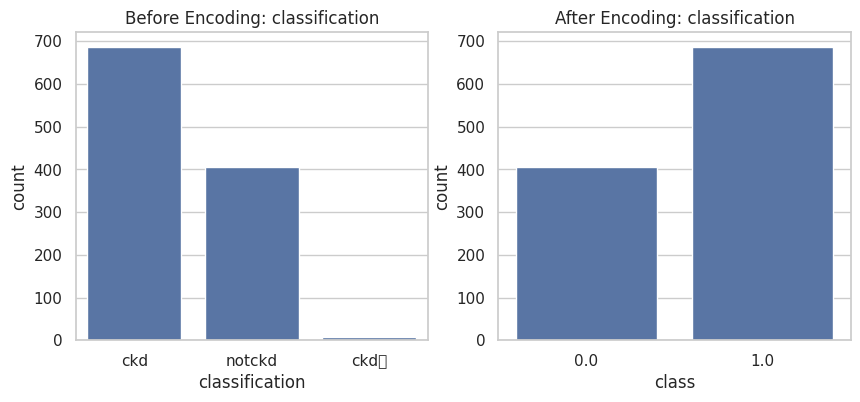

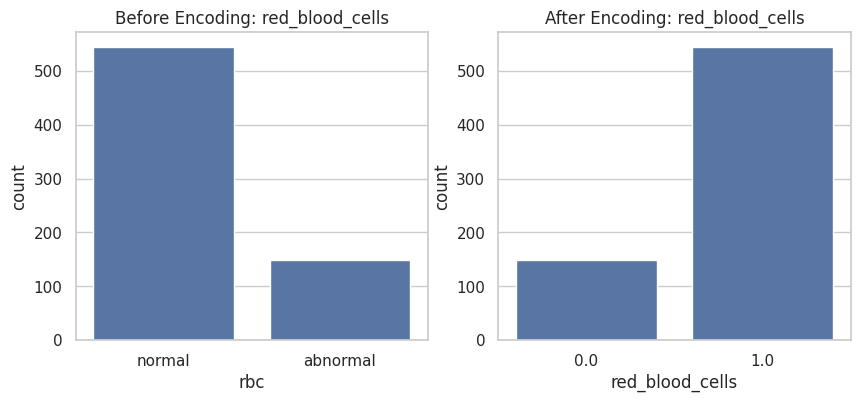

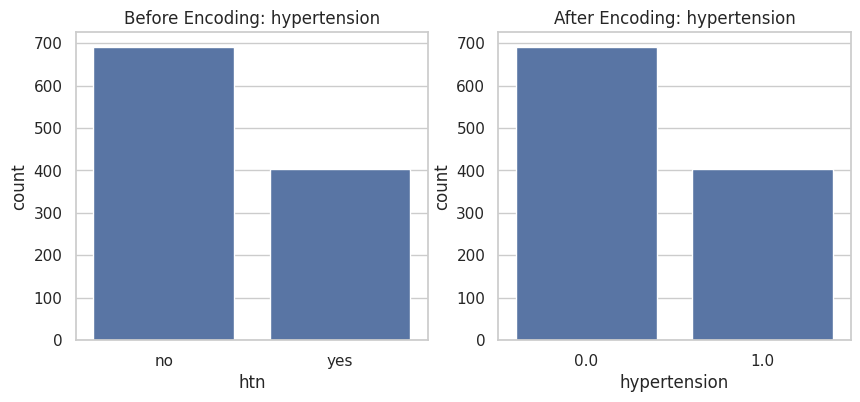

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select a few columns to visualize
cols_to_viz = ['classification', 'red_blood_cells', 'hypertension']

for col in cols_to_viz:
    # Plot before encoding (using original df)
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    if col == 'red_blood_cells':
        sns.countplot(data=df, x='rbc')
    elif col == 'hypertension':
        sns.countplot(data=df, x='htn')
    else:
        sns.countplot(data=df, x=col)

    plt.title(f'Before Encoding: {col}')

    # Plot after encoding (using new_df)
    plt.subplot(1, 2, 2)
    sns.countplot(data=new_df, x=col.replace('classification', 'class')) # Corrected column name
    plt.title(f'After Encoding: {col}')
    plt.show()